In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(theta, x):
    return theta[0] + theta[1]*x + theta[2]*x**2

In [3]:
l = 10 
theta = np.array([1.3, -1, 2])
print(theta)
x = np.random.randint(low=-5, high=5, size=(10,))
print(x)
y = f(theta, x)
print(y)

[ 1.3 -1.   2. ]
[ 4 -5  3  1 -1 -1 -2 -1 -2 -1]
[29.3 56.3 16.3  2.3  4.3  4.3 11.3  4.3 11.3  4.3]


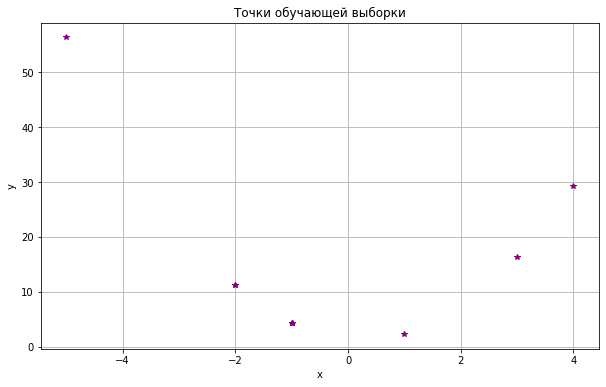

In [4]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y, '*', color='purple', label='train')
ax.grid()
plt.title('Точки обучающей выборки')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [5]:
def L(theta, x, y):
    return np.sum((np.dot(np.stack([np.ones(l), x, x**2], axis=1), theta) - y) ** 2)


def gradL(theta, x, y):
    _x = np.stack([np.ones(l), x, x**2], axis=1)
    temp = 2 * (np.dot(_x, theta) - y)
    return np.dot(temp, _x)

In [6]:
def batch(theta, e=1e-6, lr=0.0001, n=10000):
    _theta = np.copy(theta)
    loss = [L(_theta, x, y)]

    for i in range(n):
        _theta -= lr * gradL(_theta, x, y)
        loss.append(L(_theta, x, y))
        if loss[-1] < e:
            print(f'step {i}', loss[-1])
            break
        
    return _theta, loss, n

In [7]:
theta_init = np.array([1.5, 2, 4])
theta1, loss_batch1, n1 = batch(theta_init, lr=0.0001)
steps_arr1 = list(range(len(loss_batch1)))
print('Подобранные парметры theta1: ', theta1)
theta2, loss_batch2, n2 = batch(theta_init, lr=0.0003)
steps_arr2 = list(range(len(loss_batch2)))
print('Подобранные парметры theta2: ', theta2)
theta3, loss_batch3, n3 = batch(theta_init, lr=0.0007)
steps_arr3 = list(range(len(loss_batch3)))
print('Подобранные парметры theta3: ', theta3)
theta4, loss_batch4, n4 = batch(theta_init, lr=0.0008)
steps_arr4 = list(range(len(loss_batch4)))
print('Подобранные парметры theta4: ', theta4)
theta5, loss_batch5, n5 = batch(theta_init, lr=0.00091)
steps_arr5 = list(range(len(loss_batch5)))
print('Подобранные парметры theta5: ', theta5)

step 5042 9.97705605499301e-07
Подобранные парметры theta1:  [ 1.30040839 -0.99998766  1.99997475]
step 1678 9.976739410600813e-07
Подобранные парметры theta2:  [ 1.30040839 -0.99998766  1.99997475]
step 717 9.951931937044784e-07
Подобранные парметры theta3:  [ 1.30040788 -0.99998768  1.99997478]
step 627 9.927816126969182e-07
Подобранные парметры theta4:  [ 1.30040739 -0.9999877   1.99997481]
step 551 9.868153319275697e-07
Подобранные парметры theta5:  [ 1.30040616 -0.99998773  1.99997489]


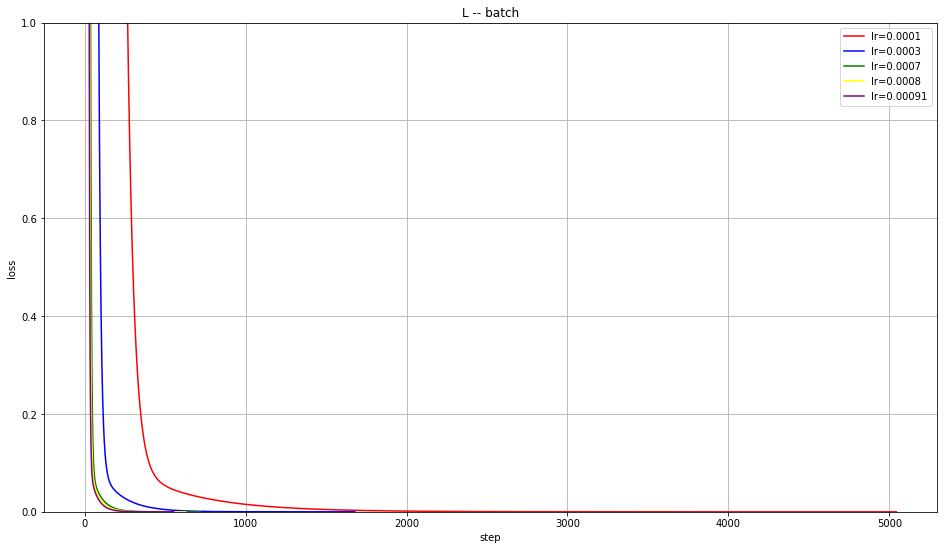

In [45]:
fig, axx = plt.subplots(figsize=(16,9))
axx.plot(steps_arr1, loss_batch1, label='lr=0.0001', color='red')
axx.plot(steps_arr2, loss_batch2, label='lr=0.0003', color='blue')
axx.plot(steps_arr3, loss_batch3, label='lr=0.0007', color='green')
axx.plot(steps_arr4, loss_batch4, label='lr=0.0008', color='yellow')
axx.plot(steps_arr5, loss_batch5, label='lr=0.00091', color='purple')
plt.ylim(top=1, bottom=0)
axx.grid()
plt.title('L -- batch')
plt.legend()
axx.set_xlabel('step')
axx.set_ylabel('loss')
plt.show()

In [9]:
def NAG(theta, e=1e-6, gamma=0.9, lr=0.0001, n=10000):
    _theta = np.copy(theta)
    loss = [L(_theta, x, y)]
    v_history = [np.array([0, 0, 0])]

    for i in range(n):
        v = gamma*v_history[-1] + lr*gradL(_theta, x, y)
        _theta -= v
        loss.append(L(_theta, x, y))
        v_history.append(v)
        if loss[-1] < e:
            print(f'step {i}', loss[-1])
            break
        
    return _theta, loss, v_history, n

In [31]:
theta_init = np.array([1.5, 2, 4])
theta1, loss_NAG1, v_history1, n1 = NAG(theta_init, gamma=0.1, lr=0.0001)
steps_arr_NAG1 = list(range(len(loss_NAG1)))
print('Подобранные парметры theta1: ', theta1)
theta2, loss_NAG2, v_history2, n2 = NAG(theta_init, gamma=0.5, lr=0.0001)
steps_arr_NAG2 = list(range(len(loss_NAG2)))
print('Подобранные парметры theta2: ', theta2)
theta3, loss_NAG3, v_history3, n3 = NAG(theta_init, gamma=0.93, lr=0.0001)
steps_arr_NAG3 = list(range(len(loss_NAG3)))
print('Подобранные парметры theta3: ', theta3)
theta4, loss_NAG4, v_history4, n4 = NAG(theta_init, gamma=0.93, lr=0.00007)
steps_arr_NAG4 = list(range(len(loss_NAG4)))
print('Подобранные парметры theta: ', theta4)
theta5, loss_NAG5, v_history5, n5 = NAG(theta_init, gamma=0.93, lr=0.0005)
steps_arr_NAG5 = list(range(len(loss_NAG5)))
print('Подобранные парметры theta: ', theta5)

step 4536 9.999333481091792e-07
Подобранные парметры theta1:  [ 1.30040885 -0.99998765  1.99997472]
step 2514 9.975474352150113e-07
Подобранные парметры theta2:  [ 1.30040836 -0.99998767  1.99997475]
step 282 4.6047046896336307e-07
Подобранные парметры theta3:  [ 1.30018391 -1.00002068  1.99997252]
step 419 9.920449847950566e-07
Подобранные парметры theta:  [ 1.30040719 -0.99998795  1.99997445]
step 258 6.120256680980513e-07
Подобранные парметры theta:  [ 1.30000374 -0.99992017  2.00001915]


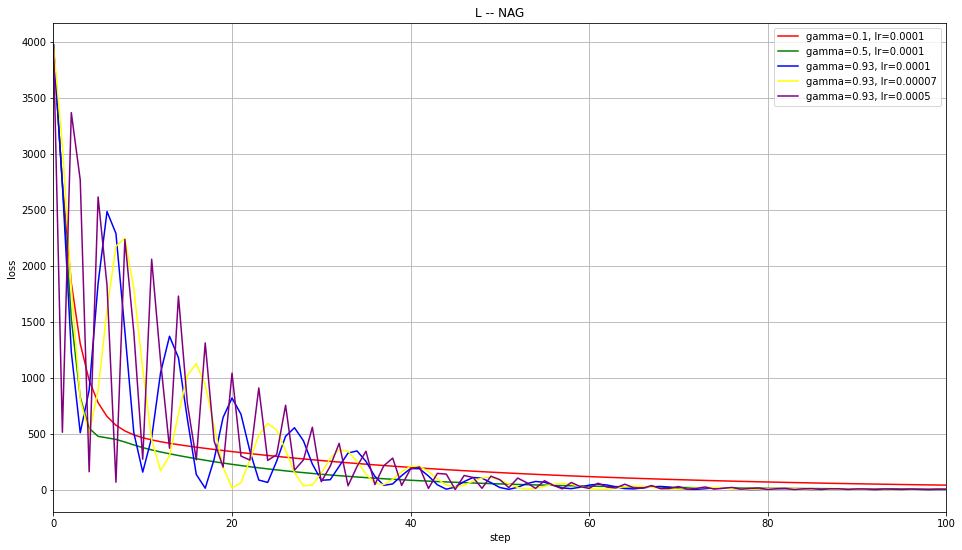

In [44]:
fig, axx = plt.subplots(figsize=(16,9))
axx.plot(steps_arr_NAG1, loss_NAG1, label='gamma=0.1, lr=0.0001', color='red')
axx.plot(steps_arr_NAG2, loss_NAG2, label='gamma=0.5, lr=0.0001', color='green')
axx.plot(steps_arr_NAG3, loss_NAG3, label='gamma=0.93, lr=0.0001', color='blue')
axx.plot(steps_arr_NAG4, loss_NAG4, label='gamma=0.93, lr=0.00007', color='yellow')
axx.plot(steps_arr_NAG5, loss_NAG5, label='gamma=0.93, lr=0.0005', color='purple')

axx.grid()
# plt.ylim(top=100, bottom=0)
plt.xlim(left=0, right=100)
plt.title('L -- NAG')
plt.legend()
axx.set_xlabel('step')
axx.set_ylabel('loss')
plt.show()

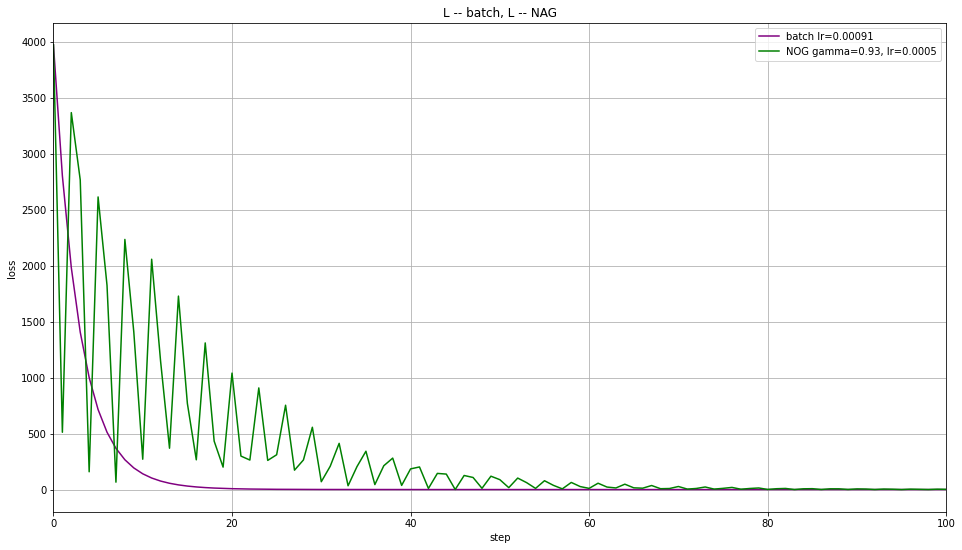

In [46]:
fig, axxx = plt.subplots(figsize=(16,9))
axxx.plot(steps_arr5, loss_batch5, label='batch lr=0.00091', color='purple')
axxx.plot(steps_arr_NAG5, loss_NAG5, label='NOG gamma=0.93, lr=0.0005', color='green')
axxx.grid()
plt.xlim(left=0, right=100)
plt.title('L -- batch, L -- NAG')
plt.legend()
axxx.set_xlabel('step')
axxx.set_ylabel('loss')
plt.show()

In [39]:
m = 7
x = np.random.uniform(low=-5, high=5, size=m)
y = f(theta, x)

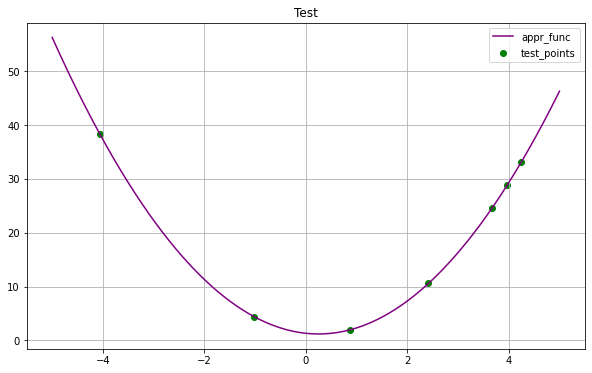

In [40]:
fig, axxxx = plt.subplots(figsize=(10,6))
plt.plot(np.linspace(-5, 5,1000), f(theta, np.linspace(-5, 5,1000)), label='appr_func', color='purple')
plt.scatter(x, f(theta, x), color='green', label='test_points')
axxxx.grid()
plt.title('Test')
plt.legend()
axxx.set_xlabel('x')
axxx.set_ylabel('f')
plt.show()